# Physics 404/604

## Computational Physics (Spring 2020)

## BPB-250

| Instructor | Prof. Zhaohuan Zhu                 |
| ---------- | :--------------------------------- |
| Email      | zhaohuan.zhu@unlv.edu              |
| Website    | http://www.physics.unlv.edu/~zhzhu |
| Office     | BPB 245                            |









# 1. Programing Style: Efficient Algorithm


## 1.1 Programming guide
* Give the correct answers
* clear and easy to read (including documenting itself)
* easy to use
* built up out of small programs that can be tested individually easy to modify and robust  
* Try to use efficient algorithm




## 1.2 Efficient ways to calculate Fibonacci numbers

Fibonacci number
The number series: 1, 1, 2, 3, 5, 8, 13, 21, 34, …
\begin{equation}
F_{n}=F_{n-1}+F_{n-2}
\end{equation}
What is $F_{n}$?


**Dynamic Programming:  
An algorithmic paradigm that solves a complex problem by breaking it into subproblems and stores the results of subproblems to avoid computing the same results again.**

## 1.3.1 Recursion method:

Recursion in computer science is a method of solving a problem where the solution depends on solutions to smaller instances of the same problem.

Most computer programming languages support recursion by allowing a function to call itself from within its own code. 

In [1]:
# Recursion
def fib2(n):      # extremely simple, but exponentially running time, very slow for large n, n cannot too large (stack limit)
    if n == 0: return 0
    elif n == 1: return 1
    else: return fib2(n-1)+fib2(n-2)

In [2]:
import time
start_time = time.time()
print(fib2(40))
print("--- %s seconds ---" % (time.time() - start_time))

102334155
--- 40.342047929763794 seconds ---


## 1.3.2 Memoization method (Top down):

an optimization technique used primarily to speed up computer programs by storing the results of expensive function calls and returning the cached result when the same inputs occur again.

turning [the results of] a function into something to be remembered

In [4]:
# if we have defined an array table = [None]*(n+1)

def fib3(n, table): # Store the data we already calculated, linear space and time complexity, but still have the stack limit
    if n == 0 or n==1:
        table[n]=n
    
    # if the value has not been calculated, calculate it 
    if table[n] is None:
        table[n] = fib3(n-1, table) + fib3(n-2, table)  # try this:  please finish this line using recursive method
        
    return table[n]

In [5]:
import time
n=10
table = [None]*(n+1)
start_time = time.time()
print(fib3(n, table))
print("--- %s seconds ---" % (time.time() - start_time))

# try this: Please calculate time if n=40, 1400, 14000

n=40
table = [None]*(n+1)
start_time = time.time()
print(fib3(n, table))
print("--- %s seconds ---" % (time.time() - start_time))


n=1400
table = [None]*(n+1)
start_time = time.time()
print(fib3(n, table))
print("--- %s seconds ---" % (time.time() - start_time))


n=14000
table = [None]*(n+1)
start_time = time.time()
print(fib3(n, table))
print("--- %s seconds ---" % (time.time() - start_time))

# In programming, the call stack is a buffer that stores requests that need to be handled.

55
--- 0.0008807182312011719 seconds ---
102334155
--- 0.0002658367156982422 seconds ---
17108476902340227241249719513231821477382749898026920041550883749834348017250935801359315038923367841494936038231522506358371361016671790887791259870264957823133253627917432203111969704623229384763490617075388642696139893354058660570399927047816296952516330636633851111646387885472698683607925
--- 0.0034949779510498047 seconds ---


RecursionError: maximum recursion depth exceeded in comparison

## 1.3.2  Tabulation Method (bottom-up)
Calculate all the values from small to big

In [12]:
# calculate numbers one by one from table[2] to table[n]

def fib4(n):
    table=[0]*(n+1)
    table[1] = 1
   
    # try this: please finish the following two lines calcuating table[i] from table[i-1] and table[i-2]
    for i in range(2,n+1):
        table[i] = table[i-1] +table[i-2]
        
    return table[n]

In [13]:
import time
start_time = time.time()
print(fib4(40))
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
print(fib4(1400))
print("--- %s seconds ---" % (time.time() - start_time))
start_time = time.time()
print(fib4(14000)) 
print("--- %s seconds ---" % (time.time() - start_time))

102334155
--- 0.0002562999725341797 seconds ---
17108476902340227241249719513231821477382749898026920041550883749834348017250935801359315038923367841494936038231522506358371361016671790887791259870264957823133253627917432203111969704623229384763490617075388642696139893354058660570399927047816296952516330636633851111646387885472698683607925
--- 0.0003228187561035156 seconds ---
30024687611784610909954941797150256486927479374907929434683754295022302429422848358634023335752162178658116387303893522391813423077567204146193912177985425759965410810605019053021570190026149647173108088094786756027114403612415007326991458343778563263940370716662743216573053208040553070210197932517628308167015873869948880323622321982198435498652758806996123592751252434571324967728548865087033966433650424543330098020063842868595816492963908030032326548984645615892344451398632426062857115917462228808073910572119126558184997987209873025407120679598408021068497765475222474299046183573947717256532535593461952826012850

## 1.3.3 Using Matrix Algebra (Optional)

$$\left[\begin{array}
{rr}
1 & 1 \\
1 & 0 \\
\end{array}\right]^n=\left[\begin{array}
{rr}
F(n+1) & F(n) \\
F(n) & F(n-1) \\
\end{array}\right]
$$

To calculate F(100), need $A^{100}$ -> $(A^{50})^2$->$A^{25}$->$A^{12}$->$A^6$->$A^3$->$A^1$

In [12]:
def arrpow(arr, n):
    yarr=arr
    if n<1:
        print('n needs to be larger than 1')
    if n==1:
        return arr
    yarr = arrpow(arr, n//2)
    yarr = [[yarr[0][0]*yarr[0][0]+yarr[0][1]*yarr[1][0],yarr[0][0]*yarr[0][1]+yarr[0][1]*yarr[1][1]],
            [yarr[1][0]*yarr[0][0]+yarr[1][1]*yarr[1][0],yarr[1][0]*yarr[0][1]+yarr[1][1]*yarr[1][1]]]
    if n%2:
        yarr=[[yarr[0][0]*arr[0][0]+yarr[0][1]*arr[1][0],yarr[0][0]*arr[0][1]+yarr[0][1]*arr[1][1]],
            [yarr[1][0]*arr[0][0]+yarr[1][1]*arr[1][0],yarr[1][0]*arr[0][1]+yarr[1][1]*arr[1][1]]]
    return yarr

def fib5(n):
    arr= [[1,1],[1,0]]
    f=arrpow(arr,n-1)[0][0]
    return f
    



In [13]:
import time
start_time = time.time()
print(fib5(40))
print("--- %s seconds ---" % (time.time() - start_time))
import time
start_time = time.time()
print(fib5(14000)) # 93 overflow
print("--- %s seconds ---" % (time.time() - start_time))

102334155
--- 0.0003170967102050781 seconds ---
3002468761178461090995494179715025648692747937490792943468375429502230242942284835863402333575216217865811638730389352239181342307756720414619391217798542575996541081060501905302157019002614964717310808809478675602711440361241500732699145834377856326394037071666274321657305320804055307021019793251762830816701587386994888032362232198219843549865275880699612359275125243457132496772854886508703396643365042454333009802006384286859581649296390803003232654898464561589234445139863242606285711591746222880807391057211912655818499798720987302540712067959840802106849776547522247429904618357394771725653253559346195282601285019169360207355179223814857106405285007997547692546378757062999581657867188420995770650565521377874333085963123444258953052751461206977615079511435862879678439081175536265576977106865074099512897235100538241196445815568291377846656352979228098911566675956525644182645608178603837172227838896725425605719942300037650526231486881066037

# 2. the complexity of the algorithms

Algorithm complexity is a measure which evaluates the order of the count of operations, performed by a given or algorithm as a function of the size of the input data. To put this simpler, complexity is a rough approximation of the number of steps necessary to execute an algorithm. When we evaluate complexity we speak of order of operation count, not of their exact count. 

For example if we have an order of $N^2$ operations to process N elements, then $N^2$/2 and 3*$N^2$ are of one and the same quadratic order.

Algorithm complexity is commonly represented with the O(f) notation e.g. O($N^2$)

In [15]:
import numpy as np
n2=np.arange(1,41,3)
time2=np.zeros(n2.size)
for i in range(n2.size):
    start_time = time.time()
    temp=fib2(n2[i])
    time2[i] = time.time()-start_time
    print(n2[i],time2[i])


NameError: name 'fib2' is not defined

In [16]:
import matplotlib.pyplot as plt
import math
plt.plot(n2,np.log10(time2))
plt.xlabel('n')
plt.ylabel('log10(time)')
plt.show()

/home/erick/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


<Figure size 640x480 with 1 Axes>

In [17]:
# try this: following the above example to calculate the time if n=n2[0], n2[1]...., and make a plot for log10(time) vs n
# for fib4
import numpy as np
n2=np.arange(100,100000,100)
time2=np.zeros(n2.size)
for i in range(n2.size):
    start_time = time.time()
    temp=fib4(n2[i])
    time2[i] = time.time()-start_time
    print(n2[i],time2[i])

    

100 7.843971252441406e-05
200 0.0001068115234375
300 0.00019049644470214844
400 0.00021576881408691406
500 0.00031757354736328125
600 0.0004458427429199219
700 0.0001983642578125
800 0.0002307891845703125
900 0.00033354759216308594
1000 0.00036835670471191406
1100 0.00040602684020996094
1200 0.0003883838653564453
1300 0.0003657341003417969
1400 0.00041556358337402344
1500 0.0003991127014160156
1600 0.0004215240478515625
1700 0.0006396770477294922
1800 0.0006597042083740234
1900 0.0005104541778564453
2000 0.0005800724029541016
2100 0.0006229877471923828
2200 0.0005791187286376953
2300 0.0006241798400878906
2400 0.0012159347534179688
2500 0.0014235973358154297
2600 0.0010230541229248047
2700 0.0009696483612060547
2800 0.002493619918823242
2900 0.002335071563720703
3000 0.0023300647735595703
3100 0.0025756359100341797
3200 0.0013740062713623047
3300 0.0013172626495361328
3400 0.0030493736267089844
3500 0.004691362380981445
3600 0.003073453903198242
3700 0.002675771713256836
3800 0.0040163

31000 0.033850669860839844
31100 0.03207683563232422
31200 0.029936552047729492
31300 0.02944159507751465
31400 0.034212350845336914
31500 0.03721785545349121
31600 0.03612542152404785
31700 0.0420689582824707
31800 0.0540461540222168
31900 0.03551626205444336
32000 0.02916884422302246
32100 0.026524066925048828
32200 0.022482872009277344
32300 0.021919965744018555
32400 0.020414113998413086
32500 0.021639108657836914
32600 0.02094745635986328
32700 0.02178955078125
32800 0.022042512893676758
32900 0.028040409088134766
33000 0.03927874565124512
33100 0.04013395309448242
33200 0.0339815616607666
33300 0.04315805435180664
33400 0.04670453071594238
33500 0.04775357246398926
33600 0.062165021896362305
33700 0.04726696014404297
33800 0.05000734329223633
33900 0.037839651107788086
34000 0.037477970123291016
34100 0.03646397590637207
34200 0.029671430587768555
34300 0.028171300888061523
34400 0.02495718002319336
34500 0.02191638946533203
34600 0.026981592178344727
34700 0.04102015495300293
34

62600 0.14153456687927246
62700 0.14835476875305176
62800 0.13409805297851562
62900 0.10895872116088867
63000 0.09279823303222656
63100 0.10245847702026367
63200 0.10512447357177734
63300 0.09889006614685059
63400 0.09891271591186523
63500 0.09097099304199219
63600 0.09003472328186035
63700 0.08825325965881348
63800 0.09905385971069336
63900 0.11583662033081055
64000 0.12823724746704102
64100 0.13333892822265625
64200 0.12118887901306152
64300 0.10281252861022949
64400 0.10187792778015137
64500 0.11290693283081055
64600 0.09940290451049805
64700 0.11393094062805176
64800 0.10670638084411621
64900 0.09308505058288574
65000 0.08811688423156738
65100 0.09430980682373047
65200 0.10251259803771973
65300 0.12872934341430664
65400 0.14856648445129395
65500 0.14809489250183105
65600 0.13947629928588867
65700 0.12318968772888184
65800 0.10737776756286621
65900 0.09682154655456543
66000 0.10329890251159668
66100 0.09319305419921875
66200 0.08849883079528809
66300 0.09270429611206055
66400 0.0929

94500 0.17414546012878418
94600 0.16169404983520508
94700 0.17029786109924316
94800 0.1701209545135498
94900 0.20174336433410645
95000 0.2416682243347168
95100 0.19756579399108887
95200 0.17438936233520508
95300 0.1593916416168213
95400 0.16998982429504395
95500 0.1700904369354248
95600 0.16649866104125977
95700 0.20769405364990234
95800 0.2497236728668213
95900 0.26229190826416016
96000 0.19108080863952637
96100 0.19164133071899414
96200 0.17245244979858398
96300 0.1698150634765625
96400 0.19390130043029785
96500 0.25987839698791504
96600 0.22982358932495117
96700 0.19406485557556152
96800 0.20237255096435547
96900 0.18254947662353516
97000 0.1917107105255127
97100 0.16495442390441895
97200 0.24332284927368164
97300 0.23082637786865234
97400 0.19600844383239746
97500 0.19838714599609375
97600 0.16601872444152832
97700 0.166365385055542
97800 0.16675257682800293
97900 0.18566393852233887
98000 0.2598094940185547
98100 0.22890567779541016
98200 0.21063709259033203
98300 0.23210883140563

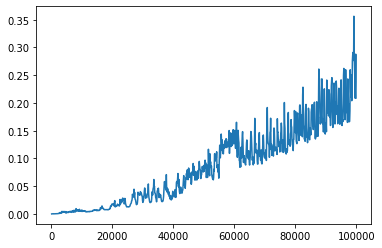

In [22]:
import matplotlib.pyplot as plt



plt.plot(n2, time2)
plt.show()

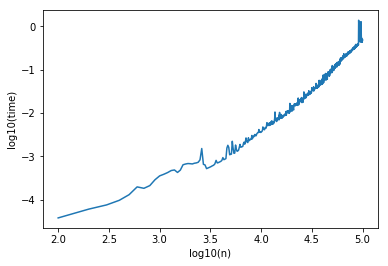

In [20]:
import matplotlib.pyplot as plt
import math
plt.plot(np.log10(n2),np.log10(time2))
plt.xlabel('log10(n)')
plt.ylabel('log10(time)')
plt.show()

In [54]:
# matrix method
n2=np.arange(1000,1000000,1000)
time2=np.zeros(n2.size)
for i in range(n2.size):
    start_time = time.time()
    temp=fib5(n2[i])
    time2[i] = time.time()-start_time


999


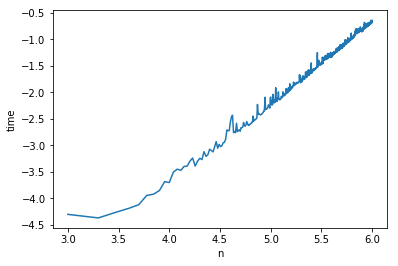

In [55]:
import matplotlib.pyplot as plt
plt.plot(np.log10(n2),np.log10(time2))
plt.xlabel('n')
plt.ylabel('time')
plt.show()